# Spam or Ham Prediction Project

## Step 1 | Setup

### Step 1.1 | Importing the necessary libraries

In [ ]:
# For dataframe management
import pandas as pd
import nltk
import warnings
# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
# For tokenization
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
# For displaying the plots in inline mode
%matplotlib inline
warnings.filterwarnings("ignore")
import time

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For logistic regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# For the results
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 1.2 | Define variables

In [ ]:
# Let's start by reading our dataset CSV file and storing it in a variable
spam = pd.read_csv(
    'spam.csv',
    encoding='latin1'
)

In [ ]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Step 2 | Data cleaning

### Step 2.1 Cleaning redundant columns

In [ ]:
# We have some columns in our dataset that we don't need, and they don't contain any data, so let's drop them.
spam.drop(
    columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
    inplace = True
)
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.2 | Rename the columns

In [ ]:
# Let's also rename the columns to more describe them
spam = spam.rename(
    columns={'v1': "is_spam", 'v2': "message" }
)
spam

,is_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Step 2.3 | Converting the column `is_spam` to a boolean value

In [ ]:
spam['is_spam'] = spam['is_spam'].apply(
                        lambda s : False if s == "ham" else True
                    )

In [ ]:
spam

,is_spam,message
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...
5568,False,Will Ì_ b going to esplanade fr home?
5569,False,"Pity, * was in mood for that. So...any other s..."
5570,False,The guy did some bitching but I acted like i'd...


## Step 3 | EDA (Elementary Data Analysis)

### Step 3.1 | Checking and deleting duplicate data

In [ ]:
spam.duplicated(keep='last').sum()

403

In [ ]:
spam = spam.drop_duplicates()
spam

,is_spam,message
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...
5568,False,Will Ì_ b going to esplanade fr home?
5569,False,"Pity, * was in mood for that. So...any other s..."
5570,False,The guy did some bitching but I acted like i'd...


### Step 3.2 | Check all null data points and ensure that there are no null values

In [ ]:
spam.isnull().sum()

is_spam    0
message    0
dtype: int64

### Step 3.3 | Counting words and characters in email

In [ ]:
spam['char_count'] = spam['message'].apply(
    lambda e : len(e)
)

In [ ]:
spam

,is_spam,message,char_count
0,False,"Go until jurong point, crazy.. Available only ...",111
1,False,Ok lar... Joking wif u oni...,29
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,False,U dun say so early hor... U c already then say...,49
4,False,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...,161
5568,False,Will Ì_ b going to esplanade fr home?,37
5569,False,"Pity, * was in mood for that. So...any other s...",57
5570,False,The guy did some bitching but I acted like i'd...,125


In [ ]:
spam['word_count'] = spam['message'].apply(
    lambda e : len( e.split() )
)

In [ ]:
spam

,is_spam,message,char_count,word_count
0,False,"Go until jurong point, crazy.. Available only ...",111,20
1,False,Ok lar... Joking wif u oni...,29,6
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,False,U dun say so early hor... U c already then say...,49,11
4,False,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...,161,30
5568,False,Will Ì_ b going to esplanade fr home?,37,8
5569,False,"Pity, * was in mood for that. So...any other s...",57,10
5570,False,The guy did some bitching but I acted like i'd...,125,26


In [ ]:
spam

,is_spam,message,char_count,word_count
0,False,"Go until jurong point, crazy.. Available only ...",111,20
1,False,Ok lar... Joking wif u oni...,29,6
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,False,U dun say so early hor... U c already then say...,49,11
4,False,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...,161,30
5568,False,Will Ì_ b going to esplanade fr home?,37,8
5569,False,"Pity, * was in mood for that. So...any other s...",57,10
5570,False,The guy did some bitching but I acted like i'd...,125,26


In [ ]:
def sentences_count(x):
    return len(sent_tokenize(x))

In [ ]:
spam['sentence_count'] = spam['message'].apply(sentences_count)
spam

In [ ]:
# Let's save the results to a new CSV file
spam.to_csv('spam_clean.csv', index=False)

### Step 3.4 | Plotting

In [ ]:
analysis_data = spam.groupby('is_spam')[['char_count', 'word_count', 'sentence_count']].mean()

In [ ]:
analysis_data

,char_count,word_count,sentence_count
is_spam,,,
False,70.459256,14.134632,1.799601
True,137.891271,23.681470,2.967841


In [ ]:
analysis_data.reset_index()

,is_spam,char_count,word_count,sentence_count
0,False,70.459256,14.134632,1.799601
1,True,137.891271,23.681470,2.967841


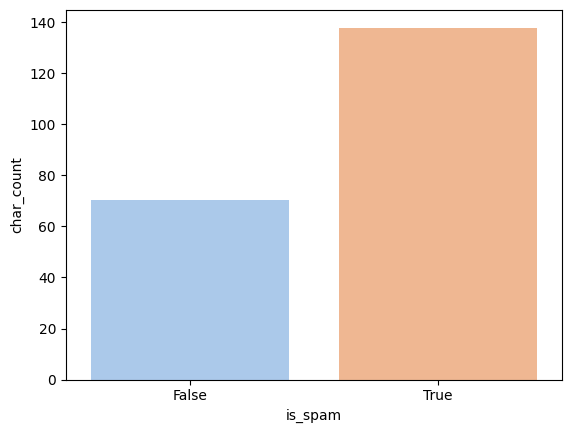

In [ ]:
sns.barplot(
    x = analysis_data.index,
    y=analysis_data['char_count'],
    palette="pastel"
);

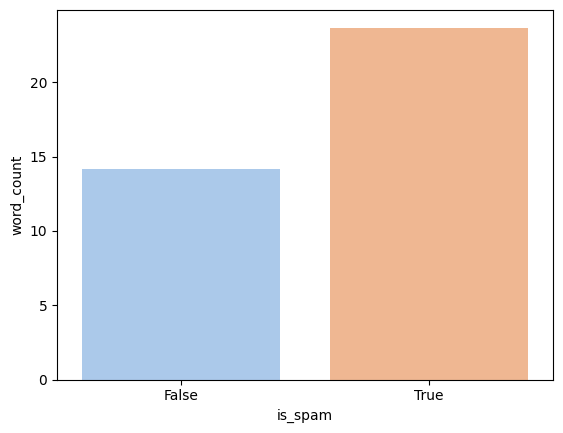

In [ ]:
sns.barplot(
    x = analysis_data.index,
    y=analysis_data['word_count'],
    palette="pastel"
);

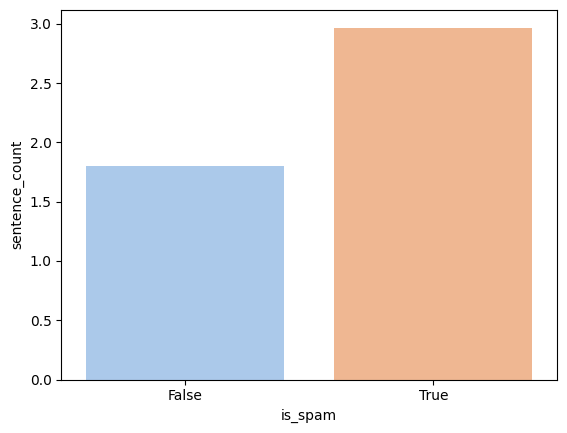

In [ ]:
sns.barplot(
    x = analysis_data.index,
    y=analysis_data['sentence_count'],
    palette="pastel"
);

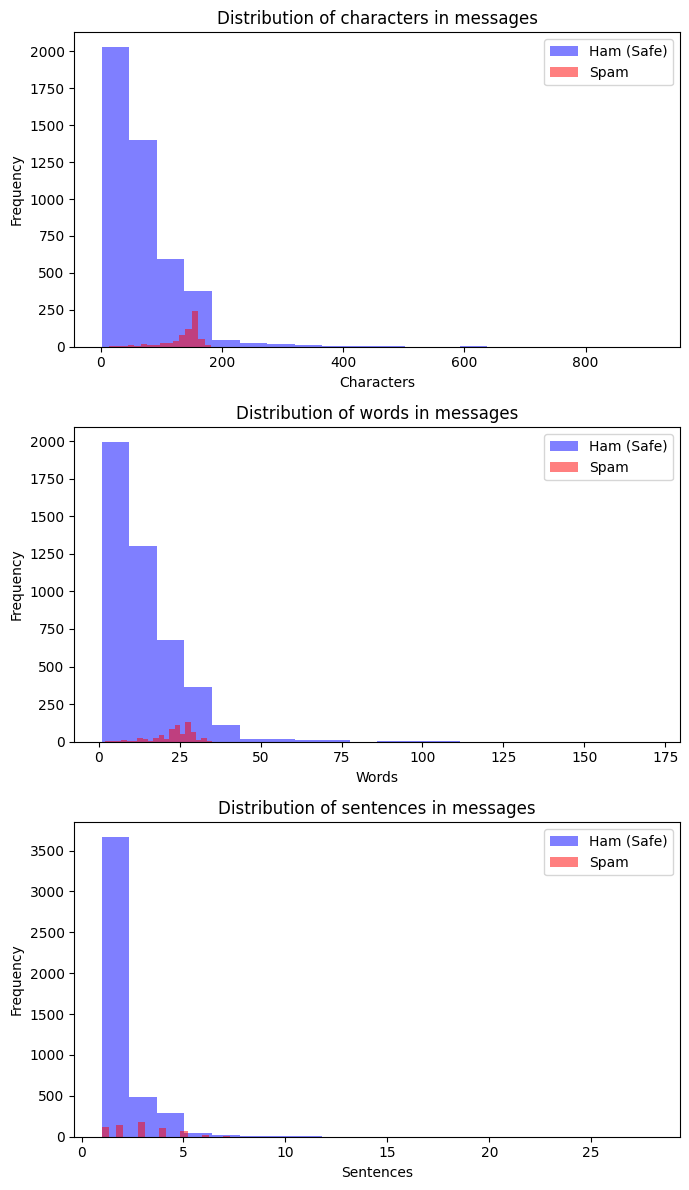

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15 // 2, 25 // 2))

# Plot histograms for 'characters', 'words_count', and 'sentences'
features = ['char_count', 'word_count', 'sentence_count']
features_text = ['characters', 'words', 'sentences']
colors = ['blue', 'red']

for i, feature in enumerate(features):
    plt.subplot(3, 1, i+1)
    for label, color in zip([False, True], colors):
        subset = spam[spam['is_spam'] == label]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=("Spam" if label else "Ham (Safe)"), color=color)
    
    plt.title(f'Distribution of {features_text[i]} in messages')
    plt.xlabel(features_text[i].capitalize())
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### Viewing the top 20 most common keywords in spam messages

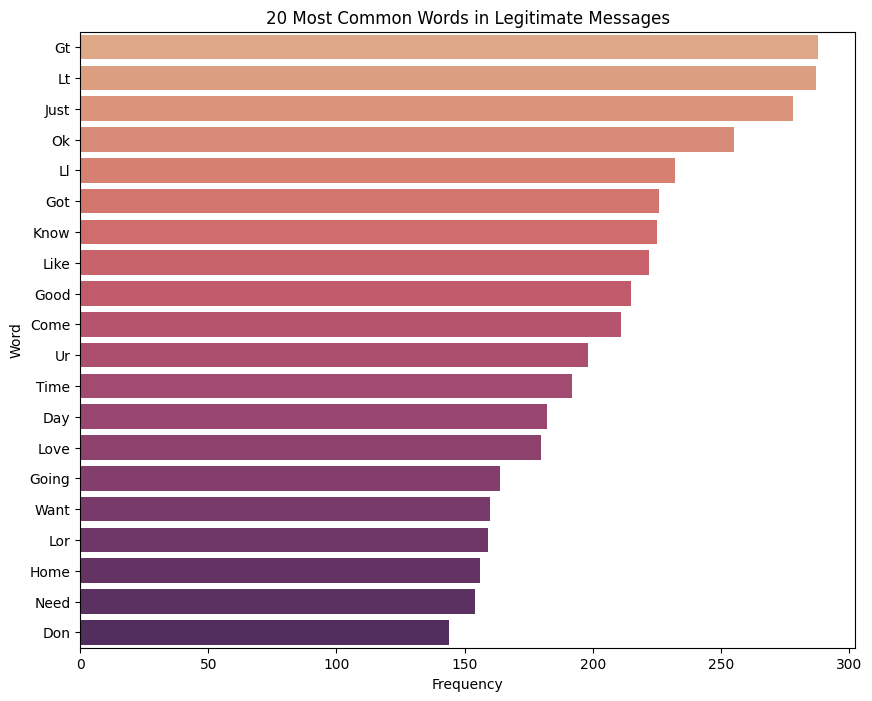

In [ ]:
# Filter for spam messages
spam_df = spam[spam['is_spam']]

# Initialize the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the data
X = vectorizer.fit_transform(spam_df['message'])

# Convert to a DataFrame with words as columns
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum counts of each word across all messages
total_word_counts = word_counts.sum().sort_values(ascending=False)

total_word_counts

# Convert to DataFrame
word_freq_df = total_word_counts.reset_index()
word_freq_df.columns = ['Word', 'Frequency']

# Capitalize the words
word_freq_df['Word'] = word_freq_df['Word'].apply(lambda x: x.capitalize())

# Select top N words
top_words = word_freq_df.head(20)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=top_words, palette='flare')
plt.title('20 Most Common Words in Legitimate Messages')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Step 4 | Prediction

### Step 4.1 Splitting the dataset for training and testing 

## Approach 1 | Only using `message` as input

In [ ]:
# Define the X and Y Axis
X = spam["message"]
y = spam["is_spam"]

# Use CountVectorizer to convert the text messages into a format suitable for the model
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create our model object
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model and show the metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9787234042553191
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       889
        True       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



## Approach 2 | Using the other numerical values in the dataset

In [ ]:
# Define the X and Y Axis
X = spam[["message", "char_count", "word_count", "sentence_count"]]
y = spam["is_spam"]

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Define the text processing and numerical feature processing steps
text_preprocessor = TfidfVectorizer(stop_words='english', max_features=1000)
numerical_features = ['char_count', 'word_count', 'sentence_count']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_preprocessor, 'message'),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Create a Pipeline with the preprocessor and logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model and show the metrics
# Predict on the test set
y_pred = model.predict(X_test)
print(X_test[0:1])

# Print classification report and accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

                            message  char_count  word_count  sentence_count
1617  Did u download the fring app?          29           6               1
Accuracy: 0.9787234042553191
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       889
        True       0.98      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Conclusion: Both approaches result in a very similar result because the numeric values (such as the sentence count, character count) are based on the message itself

In [ ]:
import joblib

joblib.dump(model, 'spam_model.pkl')


['spam_model.pkl']

## Step 5 | Website

Frontend with Streamlit

In [ ]:
# For installing streamlit, run only once
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.6/241.6 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Not uninstalling protobuf at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'protobuf'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages tha

In [ ]:
# For running the app.py
!streamlit run app.py


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[

https://docs.google.com/document/d/1Iqhk9EZlebgF-QkuJpMWxC_if8DsyyJCrIOYZRnyYus/edit?usp=sharing

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0c1d745-0166-4859-b787-0d3b5f4323b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>